<a href="https://colab.research.google.com/github/A21ditya-Singh05/Customer_Churn_Analysis/blob/main/catdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:09<00:00, 125MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [ ]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 174MB/s]
100% 1.06G/1.06G [00:09<00:00, 123MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding= 'valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid', activation = 'relu', ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding= 'valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation = 'relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding= 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:








































































































































































































































































model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [ ]:
history= model.fit(train_ds,epochs=10 , validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 82ms/step - accuracy: 0.5581 - loss: 2.7968 - val_accuracy: 0.6308 - val_loss: 0.6651
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.6137 - loss: 0.6658 - val_accuracy: 0.6622 - val_loss: 0.6237
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.6762 - loss: 0.5922 - val_accuracy: 0.6916 - val_loss: 0.5642
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 85ms/step - accuracy: 0.7419 - loss: 0.5205 - val_accuracy: 0.7748 - val_loss: 0.4756
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7920 - loss: 0.4418 - val_accuracy: 0.7946 - val_loss: 0.4582
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8184 - loss: 0.3920 - val_accuracy: 0.7990 - val_loss: 0.4346
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.8471 - loss: 0.3408 - val_accuracy: 0.7380 - val_loss: 0.6742
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.8672 - loss: 0.2907 - 

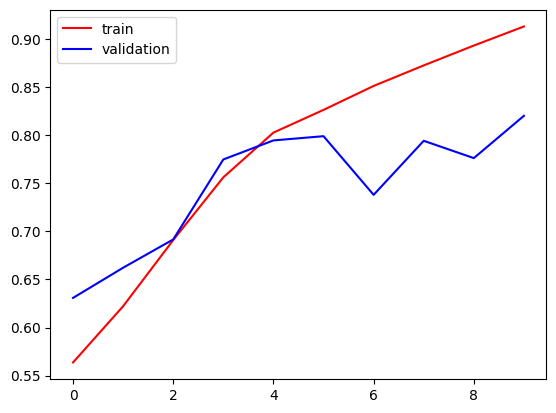

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

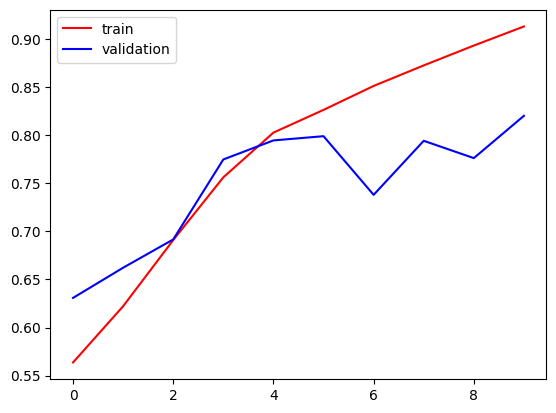

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Trying data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

train_ds = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [ ]:
history = model.fit(
       train_ds,
       epochs=10,
       validation_data=validation_ds
   )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 315s 493ms/step - accuracy: 0.7489 - loss: 0.5233 - val_accuracy: 0.5000 - val_loss: 1.0940
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 494ms/step - accuracy: 0.8059 - loss: 0.4255 - val_accuracy: 0.5000 - val_loss: 0.8996
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 317s 486ms/step - accuracy: 0.8173 - loss: 0.3982 - val_accuracy: 0.5000 - val_loss: 2.7479
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 309s 490ms/step - accuracy: 0.8214 - loss: 0.4078 - val_accuracy: 0.5000 - val_loss: 1.2514
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 490ms/step - accuracy: 0.8444 - loss: 0.3631 - val_accuracy: 0.5000 - val_loss: 1.4951
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 325s 495ms/step - accuracy: 0.8579 - loss: 0.3387 - val_accuracy: 0.5000 - val_loss: 0.8887
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 308s 488ms/step - accuracy: 0.8599 - loss: 0.3280 - val_accuracy: 0.5000 - val_loss: 0.7335
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 310s 492ms/step - accuracy: 0.8701 - loss: 0.31

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

NameError: name 'plt' is not defined